CHEME 465 Fall 2020; HW3; Question 3
3)You havea liquid-phase,irreversible chemical reactionoccurring in a series of equally sized CSTRs.A àBFrom  your  extensive  Googling  of  this  particular  reaction,  you  know  that  k(T  =  450  K)  = 3.98x10-3hr–1and that the energy barrier for the reaction is Ea= 7kcal/mol. You are also given  the  following  conversion  data  as  a  function  of  the  Damköhler number(Da)from theseries of CSTRs. You can assumethat the volume of each reactor is 4000L, CA0= 1.8 mol/L, u0= 20 L/hr, and T = 450 K.Da0.00.30.60.91.21.51.82.12.42.73.0X0.000.5450.7560.8540.9060.9360.9540.9660.9750.9800.984
 a.Instead of counting the number of CSTRs in series, you assume that it would be much easier to compute it based off of the provided data. Assuming that the reaction is first order, plot the experimental data along with analytical curves for X vs. Dawith the number of tanks varying to find curve which matchesin Python. (Note: Da should be plotted along the x-axis)
 b.Given the provided operatingand kineticparameters, what is the conversion achieved in this system?
 c.Now that you know the number of CSTRs there are in series, if the temperature of the system is increased to 500 K and everything else stays the same, what would the conversion be?   d.If the initial concentration is doubled, how would this change the volume?
  e.If you wanted to increase the conversion of this reaction, how would you change the parametersfor  the  CSTRs  in  series  (e.g.,  reactor  volumes,  flow  rates,  number  of reactors)?

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#Given Information from Problem 3
k_450 = 3.98*10**(-3)    #unit: 1/hr (T = 450K)
Ea    = 7                #unit: kcal/mol
V     = 4000             #unit: L - Volume of each reactor
C_A0  = 1.8              #unit: mol/L
v_0   = 20               #unit: L/hr
T_450 = 450              #unit: K
R     = 1.987*10**(-3)   #unit: kcal/(mol*K)
Da_exp    = np.array([0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0])
X     = np.array([0.00, 0.545, 0.756, 0.854, 0.906, 0.936, 0.954, 0.966, 0.975, 0.980, 0.984])

From the plot, we see the # of CSTRs in series =3


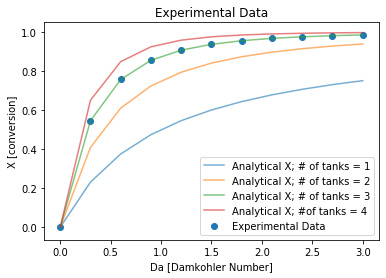

In [76]:
#Part A


X_calc1 = 1 - 1/(1+Da_exp)**(1)
X_calc2 = 1 - 1/(1+Da_exp)**(2)
X_calc3 = 1 - 1/(1+Da_exp)**(3)
X_calc4 = 1 - 1/(1+Da_exp)**(4)

plt.title("Experimental Data") 
plt.xlabel("Da [Damkohler Number]" ) 
plt.ylabel("X [conversion]") 

plt.scatter(Da_exp, X, alpha = 1, label = "Experimental Data")
plt.plot(Da_exp, X_calc1, alpha = 0.6, label = "Analytical X; # of tanks = 1")
plt.plot(Da_exp, X_calc2, alpha = 0.6, label = "Analytical X; # of tanks = 2")
plt.plot(Da_exp, X_calc3, alpha = 0.6, label = "Analytical X; # of tanks = 3")
plt.plot(Da_exp, X_calc4, alpha = 0.6, label = "Analytical X; #of tanks = 4")
plt.legend(loc='best')

print('From the plot, we see the # of CSTRs in series =3')

In [72]:
#Part B

# Assume reaction is first order so -r_A = k*C_A
Da1_b = k_450*C_A0*V/(v_0*C_A0)
# from part a n = 3
Xf_b = 1 - 1/(1+Da1_b)**(3)
# Conclusion:
print('Part B will have a conversion = {:.3f}'.format(Xf_b))


Given operating/kinetic parameters, conversion = 0.827


In [79]:
#Part C

#If temperature=500K

# Equation to use for k based on temperature k = A*exp(-Ea/(R*T))
#at k=450 K
A = k_450/(np.exp(-Ea/(R*T_450)))
#at k 500K:
k_500 = A*np.exp(-Ea/(R*500))


#Assume reaction is first order so -r_A = k*C_A
Da1_c = k_500*C_A0*V/(v_0*C_A0)

#We know from part A n = 3:
Xf_c = 1 - 1/(1+Da1_c)**(3)


print('For Part C conversion = {:.3f}'.format(Xf_c))


For Part C conversion = 0.951


In [81]:
#Part D

#Initial concentration doubled;  how would this affect volume?

C_A0_d = 2*C_A0

# Volume of tank #3; V = v_0*C_A0*(X_3-X_2)/(-r_A_exit)  
# At T = 450 K: 
X_2 = 1 - 1/(1+Da1_b)**(2)
X_3 = 1 - 1/(1+Da1_b)**(3)
V_d = v_0*C_A0_d*(X_3-X_2)/(k_450*C_A0_d*(1-X_3))

print('Original Volume = {:.2f} L'.format(V))

print('Volume If we double intial concentration volume = {:.2f} L'.format(V_d))

print('Volume is the same if initial concentration is doubled.')

Original Volume = 4000.00 L
Volume If we double intial concentration volume = 4000.00 L
Volume is the same if initial concentration is doubled.


In [75]:
#Part E

#To increase conversion, what parameters should be adjusted?
#I will use the value from part b to compare

print('Compare to the Conversion from part b = {:.3f} \n'.format(Xf_b))

#Doubling flow rate of reactors

#Assume reaction is first order so -r_A = k*C_A
Da1_e = k_450*C_A0*V/((v_0*2)*C_A0)

#Part a; n = 3:
Xf_e = 1 - 1/(1+Da1_e)**(3)

print('doubling flow rate conversion = {:.3f}'.format(Xf_e))

#If we cut in half flow rate of reactors

#Assume reaction is first order so -r_A = k*C_A
Da1_e = k_450*C_A0*V/((v_0/2)*C_A0)

#Part a; n = 3:
Xf_e = 1 - 1/(1+Da1_e)**(3)

print('Halfing flow rate conversion = {:.3f}'.format(Xf_e))

#Doubling volume of reactors

#Assume reaction is first order so -r_A = k*C_A
Da1_e = k_450*C_A0*(V*2)/(v_0*C_A0)

#from part A n = 3:
Xf_e = 1 - 1/(1+Da1_e)**(3)

print('Doubling volume of reactors conversion = {:.3f}'.format(Xf_e))

#doubling number of reactors
#Assume reaction is first order so -r_A = k*C_A
Da1_e = k_450*C_A0*V/(v_0*C_A0)
Xf_e = 1 - 1/(1+Da1_e)**(3*2)

print('doubling number of reactors conversion = {:.3f} \n'.format(Xf_e))

print('To increase the conversion for this problem')
print('Decrease flow rate. Increase volume. Increase # of reactors.')

Compare to the Conversion from part b = 0.827 

doubling flow rate conversion = 0.634
Halfing flow rate conversion = 0.943
Doubling volume of reactors conversion = 0.943
doubling number of reactors conversion = 0.970 

To increase the conversion for this problem
Decrease flow rate. Increase volume. Increase # of reactors.
